Show some ways of getting $\pi$
====

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt, cm
import seaborn as sns

Sampling
------

Sample from a circle. The ratio between the number of uniform samples falling in a square with sidelength 2 and the samples which fall into the circle enclosed by this square can be used to calculate $\pi$. Down below the ratio between uniformly distributed random samples falling into the red area and samples falling into the purple area are $\tfrac\pi4$.

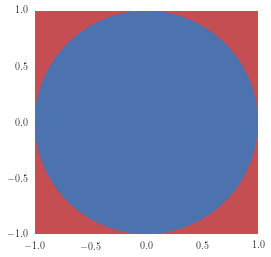

In [2]:
fig, ax = plt.subplots(figsize=(4,4))

colors = sns.color_palette()
b = colors[0]
r = colors[2]

ax.add_patch(plt.Rectangle((-1,-1), 2, 2, fill=True, facecolor=r, edgecolor='none', lw=2, alpha=1))
ax.add_patch(plt.Circle((0,0), 1, fill=True, facecolor=b, edgecolor='none', alpha=1))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)

None

In [3]:
# Prepare animation:
from IPython.display import display, clear_output, display_png
from IPython.core.pylabtools import print_figure
from IPython.html.widgets import Latex, Image, HBox, FlexBox
import time

def prepare_matplotlib(res=500):
    fig, ax1 = plt.subplots(1, 1, figsize=(4, 4))

    _ = ax1.xaxis.set_visible(False)
    _ = ax1.yaxis.set_visible(False)
    #_ = ax1.set_xlim((-1,1))
    #_ = ax1.set_ylim((-1,1))

    # Reset plots
    #sc_in, = ax1.plot([], [], ls='', ms=3, marker='.', color=b)
    #sc_out, = ax1.plot([], [], ls='', ms=3, marker='.', color=r)
    image = np.ones((res**2))*0.
    colormap = cm.colors.ListedColormap([[1,1,1,0], b, r])

    imshow = ax1.imshow(image.reshape(res,res).astype(int), 
                        cmap=colormap, interpolation='nearest', aspect='auto', vmin=0, vmax=2)

    title = ax1.set_title('', fontsize=20)

    # Make image show
    im = Image(value=print_figure(fig))

    # Weirly it shows the fig always, although never called for...
    plt.close(fig)
    return fig, title, im, image, imshow

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [20]:
def next_sample(nums, num_samples=1e4):
    samples = np.random.uniform(-1, 1, (1e4, 2))
    w = np.sqrt(np.einsum('ij,ij->i', samples, samples)) < 1
    nums[0] += w.sum()
    nums[1] += w.size
    return samples, w

# Make animation function:
def animate_image(samples, w, res, image):
    sc_in = (res*(samples[w]+1)/2.).astype(int)
    sc_out = (res*(samples[~w]+1)/2.).astype(int)

    #image[sc_in]
    #return sc_in, sc_out
    image[sc_in[:,0]*res + sc_in[:,1]] = 1
    image[sc_out[:,0]*res + sc_out[:,1]] = 2
    #imshow.set_data(image.reshape(res,res))

In [ ]:
plt.close('all')
fig, title, im, image, imshow = prepare_matplotlib(res)

# Reset the counters:
res = 500
iter_samples=1e4
nums = np.array([0., 0.])
display(im)

try:
    for i in range(200):
        samples, w = next_sample(nums, iter_samples)
        animate_image(samples, w, res, image)
        imshow.set_data(image.reshape(res,res))
        #l.value = r'{:.5f}'.format(4.*nums[0]/nums[1])
        title.set_text('$\pi\sim{}$'.format(4.*nums[0]/nums[1]))
        #im.value = print_figure(fig)
        #display(im)
        im.value = print_figure(fig)
        time.sleep(.5)
except KeyboardInterrupt:
    pass
finally:
    print 'After {:g} samples pi estimate = {:.6g}'.format((i+1)*iter_samples, 4.*nums[0]/nums[1])

In [ ]:
np.pi

## Using Plotly

In [15]:
from plotly import tools
from plotly import plotly as py
from plotly.graph_objs import Scatter, Line,\
    Marker, Font, Scattergl, Annotation, Annotations

In [16]:
figure = tools.make_subplots(1, 1)
stream_ids = tools.get_credentials_file()['stream_ids']
print stream_ids

This is the format of your plot grid:
[ (1,1) x1,y1 ]

[u'308aiiyi99', u'u1yu5l7cei', u's0y5bygwr6', u'y4metlq4nq', u'z49sg3rdh7', u'ojl0uqq0kv', u'w9vua8bwxp', u'ygzeuyqj9b', u'g2w9g2erkb', u'3ioa2qa0zb', u'qea1ghffsz']


In [17]:
pi_inner = Scatter(
    x=[],
    y=[],
    stream=dict(
        token=stream_ids[0],
        maxpoints=1e6,
    ),
    mode='markers',
    marker=Marker(
        #color='rgb({},{},{})'.format(*np.multiply(b,255).astype(int)),
        symbol='square',
        size=4,
    )
)
pi_square = Scatter(
    x=[],
    y=[],
    stream=dict(
        token=stream_ids[1],
        maxpoints=1e6,
    ),
    mode='markers',
    marker=Marker(
        #color='rgb({},{},{})'.format(*np.multiply(r,255).astype(int)),
        symbol='square',
        size=4,
    )
)

pi_estimate = Scatter(
    x=[],
    y=[],
    stream=dict(
        token=stream_ids[2],
        maxpoints=400,
    ),
    mode='lines+markers',
    marker=Marker(
        #color=r,
        symbol='square', 
        size=3,
        line=Line(
            width=.5,
            color='white'
        ),
    ),
    line=Line(width=.1),    
)



#figure.append_trace(pi_inner, 1, 1)
#figure.append_trace(pi_square, 1, 1)
figure.append_trace(pi_estimate, 1, 1)

figure.layout.shapes = [
        # Line Horizontal
        {
            'type': 'line',
            'x0': 0,
            'y0': np.pi,
            'x1': 1,
            'y1': np.pi,
            'yref': 'y1',
            'xref':'paper',
            'line': {
                'color': 'rgb(255, 20, 96)',
                'width': 1.5,
                'dash': 'dash',
            },
        },]

py.plot(figure, filename='pi_markerssampling')

u'https://plot.ly/~maxz/620'

In [18]:
# reset the plot:
res = 500
iter_samples=1e4
nums = np.array([0., 0.])
i = 0

In [23]:
try:
    streams = [py.Stream(token) for token in stream_ids[:3]]
    #for s in streams:
    #    s.open()
    streams[2].open()
    count = 0
    while count<200:
        samples, w = next_sample(nums, iter_samples)
        inner = samples[w]
        outer = samples[~w]
        #streams[0].write(dict(x=inner[:,0], y=inner[:,1]))
        #streams[1].write(dict(x=outer[:,0], y=outer[:,1]))
        streams[2].write(dict(x=(i+1)*iter_samples, y=4.*nums[0]/nums[1]))
        i += 1
        count += 1
        time.sleep(.5)
except KeyboardInterrupt:
    pass
finally:
    streams[2].close()
    #for s in streams:
    #    s.close()
    print 'After {:g} samples pi estimate = {:.6g}'.format((i+1)*iter_samples, 4.*nums[0]/nums[1])

After 6.01e+06 samples pi estimate = 3.1414
